In [7]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### 1 task
Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: типом лекарства и результатом его применения. 

Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     

Result - фактор с двумя градациями: positive, negative.

Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка и возвращать вектор из двух элементов: название строчки и столбца этой ячейки.

Для расчета стандартизированных остатков вы можете воспользоваться уже знакомой вам функцией chisq.test(). Изучите справку по этой функции, чтобы найти, где хранятся стандартизированные остатки.

In [3]:
df_c = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")

def max_resid(df):
  cross_tab = pd.crosstab(df.iloc[:,0], df.iloc[:,1])
  chi, p, dof, exp = chi2_contingency(cross_tab)
  std_residuals = (exp - cross_tab) / np.sqrt(exp)
  # Looks clunky, but I can't come up with elegant solution
  max_element = std_residuals[std_residuals == np.max(std_residuals).max()].dropna(axis=1, how="all").dropna()
  return [max_element.index[0], max_element.columns[0]]

max_resid(df_c)

['drug_1', 'negative']

In [6]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv") 

tbl = sm.stats.Table.from_data(df) # Получаем таблицу сопряженности
resid = tbl.resid_pearson # Считаем остатки, данная функция возвращает Dataframe
res = resid.stack().index[np.argmax(resid.values)] # Возвращаем индекс и название колонки с максимальным остатком.

res

('drug_1', 'positive')

### 2 task
Ну и напоследок построим гистограмму частот при помощи ggplot2!

Основной способ визуализировать распределение частот номинативной переменной - гистограмма частот (барплот). Используя библиотеку ggplot2 и встроенные данные diamonds, постройте график распределения частот переменной color, на котором за цвет заполнения столбиков отвечает переменная cut. Сохраните код графика в переменную obj. В итоге должен получиться вот такой график.

data https://www.kaggle.com/shivam2503/diamonds#

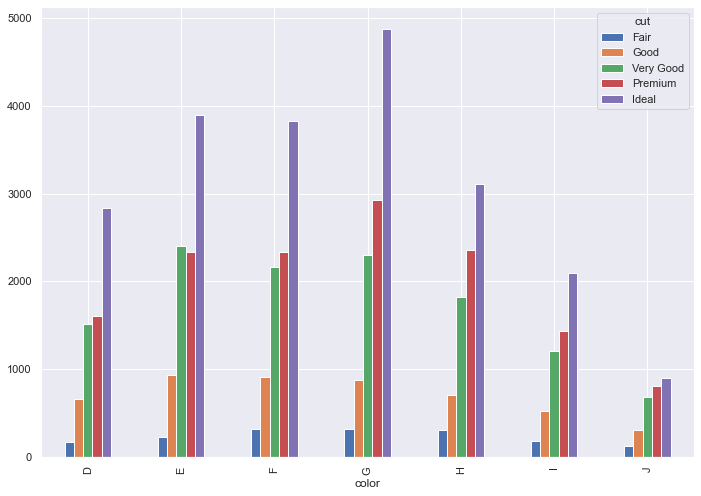

In [18]:
sns.set_theme()

df = pd.read_csv('diamonds.csv')
crosstab = pd.crosstab(df.color, df.cut)[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
crosstab.plot(kind='bar')
sns.set(rc={'figure.figsize':(50, 20)})

plt.show()